#### Project: Predicting the Stock Share of Exxon Movbile using Simple Linear Regression Models

#### Introduction

Since the early years of humanity, there has always been a desire to predict future outcomes before they happened. The Ancient Greeks used Oracles, or divine priestesses, to predict the future by listening to their supposed messages from the Gods. The Ancient Chinese would engrave messages on bones, mashup and heat the bones, and then use the priest to interpret the answers returned by divine entities. While their approaches may have been different, the goal was the same: predict an outcome before it happened.

As time went on, humanity developed and invented new fields of study related to mathematics and statistics. These topics would help scientist and mathematicians develop new ways to explore their world and devise more realistic means of prediction that were grounded in observations and data.

However, all these models required data that could be measured and manipulated, something that was challenging to obtain before the advent of the computer. Enter the age of the modern computer, and data went from a scarce asset to an overly abundant commodity that required new technologies to handle and analyzes.

The combination of a large amount of data & powerful computers that could compute more numbers in a few minutes than a single person could in their entire life, meant we could make models more accurate and dynamic than ever before. Soon, the field of machine learning would take off as individuals realized they could create computer programs that could learn from all of this data.

In this Notebook we will use the Linear Regression Model. The Linear Regression Model attempts to model the relationship between two variables by fitting a linear equation to observed data. In the model, one variable is considered to be an explanatory variable (X Variable), and the other is considered to be a dependent variable (Y Variable).

#### Background

In our example, we are going to try an model the relationships between two financial assets, the price of a single share of __Exxon Mobile__ stock and the price of a barrel of oil. The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of **Exxon Mobile** stock.)

#### Why choosing a Linear Regression Model for this Exemple

* We want to know whether one measurement variable is associated with another measurement variable.
* We want to measure the strength of the association (By Computing the Correlation Coefficient R²).
* We want an equation that describes the relationship and can be used to predict unknown values.


---

#### The Linear Regression Model 

$y = \beta_0 + \beta_1x$

Where each term represents:

>* $y$ : The Dependent Variable (in our case the Single Share of __Exxon Mobile__ Stock).
>* $x$ : The Independent/Explanatory Variable (in our case the Oil Barrel)
>* $\beta_0$ : The Intercept.
>* $\beta_1$ : The Slope.

#### Importing our Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np

import statsmodels.api as sm

from scipy import stats
from scipy.stats import kurtosis, skew

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

#### Loading Data 


In [2]:
# The path of the file
filepath = r"D:\Bassam Projects\Exxon Mobile Stock Share Prediction\oil_exxon.xlsx"

# DataFrame
df = pd.read_excel(filepath)
print("The DateFrame shape is : ", df.shape)
# print("The Count of our Data is : ", df.count)
df.tail(10)

# type(df)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Bassam Projects\\Exxon Mobile Stock Share Prediction\\oil_exxon.xlsx'

In [3]:
# Using the DataFrame from pandas
# We can also create our proper dataframe, whitout reading a csv, excel ... file

data = {
    'date' : ['2019-04-01', '2019-04-01', '2019-04-05', '2019-04-06', '2019-04-08', '2019-04-10', '2019-04-12'],
    'exon_price' : ['85.232560', '81.255365', '82.265265', '85.26632', '87.26354', '86.25635', '87.02563'],
    'oil_price' : ['65.23', '65.23', '64.59', '67.56', '64.25', '68.32', '64.05'], 
}

data_price = pd.DataFrame(data)
type(data_price['oil_price'])
# data_price.head()

# data_price.columns

pandas.core.series.Series

In [4]:
# Manipulating the Data with  Pandas

df.iloc[-1]
type(df.iloc[0])

df.iloc[[0, 1 , -1]]

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
1255,2019-03-25,79.919998,67.37


In [5]:
### 
data_price
data_price.loc[(data_price['date'] == '2019-04-01') | (data_price['oil_price'] == 65.23), 'exon_price']
data_price[data_price['oil_price'] == 65.23]


,date,exon_price,oil_price


### Cleaning the Data

In [6]:
# Reseting the Index 
df.reset_index(drop = True)

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88
...,...,...,...
1251,2019-03-19,80.870003,67.13
1252,2019-03-20,81.320000,68.35
1253,2019-03-21,81.790001,68.30
1254,2019-03-22,80.480003,66.29


In [7]:
df = pd.read_excel(filepath)
df.head()
df.columns

df.index = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)

# print the last five rows of out dataframe
df.tail()


# show the rows where the oil_price equals to #N/A
df.loc[(df['oil_price'] == ' ')]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,exon_price,oil_price
date,,


In [8]:
### Checking the Data Types, and make sure they are correct
df.dtypes
df.shape



(1256, 2)

In [9]:
### Make Sure the columns names' are spelled correctly
df = df.rename(columns = {'exon_price': 'exxon_price'})

### Changing ' ' to '_'
df.columns = df.columns.str.replace( ' ', '_')
df.columns = df.columns.str.upper()

type(df.columns)

### printing our dataframe
df.head()

,EXXON_PRICE,OIL_PRICE
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [10]:
### Checking for missing values
display(df.isna().any())

### Drop missing values
df = df.dropna()

### Rechecking the removal
df.isna().any()


EXXON_PRICE    False
OIL_PRICE       True
dtype: bool

EXXON_PRICE    False
OIL_PRICE      False
dtype: bool

In [11]:
df

,EXXON_PRICE,OIL_PRICE
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


### Exploring the data

<p> In this step, we dig into the dataframe to understand the data, by answering these questions:</p>

    1- How is the data distributed ?
    2- Does there appear to be a relationship between variables ?
    3- Are there any outliers ?
    4- Is the Data Skewed

In [12]:
df

,EXXON_PRICE,OIL_PRICE
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


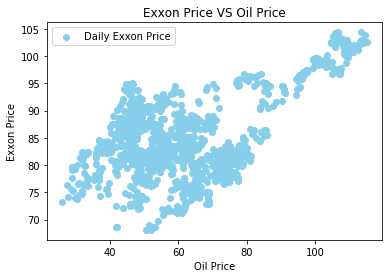

In [13]:
### Plotting a scatter plot to see the dependency between the 2 variables

import matplotlib.pyplot as plt
import numpy as np

x = np.asarray(df['OIL_PRICE'])
y = np.asarray(df['EXXON_PRICE'])

plt.scatter(x, y, color='skyblue', label = 'Daily Exxon Price')
plt.xlabel('Oil Price')
plt.ylabel('Exxon Price')
plt.title('Exxon Price VS Oil Price')
plt.legend()

### Measuring the Correlation of our Dataset 

In [14]:
df.corr()

,EXXON_PRICE,OIL_PRICE
EXXON_PRICE,1.00000,0.60132
OIL_PRICE,0.60132,1.00000


In [15]:
df.describe()

,EXXON_PRICE,OIL_PRICE
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


#### Measuring the outliers and skewness of the data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A25F3CBC8>,
      dtype=object)

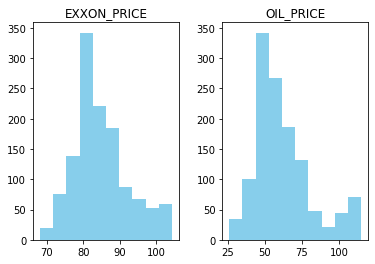

In [16]:
df.hist(grid = False, color='skyblue')

In [17]:
### We will be using the fisher method, not the pearson one

exxon_kurtosis = kurtosis(df['EXXON_PRICE'], fisher = True)
oil_kurtosis = kurtosis(df['OIL_PRICE'], fisher = True)

exxon_skew = skew(df['EXXON_PRICE'])
oil_skew = skew(df['OIL_PRICE'])

display('Exxon Kurtosis: {:.3}'.format(exxon_kurtosis))
display('Oil Kurtosis: {:.3}'.format(oil_kurtosis))

display('Exxon Skew: {:.3}'.format(exxon_skew))
display('Exxon Skew: {:.3}'.format(oil_skew))

'Exxon Kurtosis: 0.0884'

'Oil Kurtosis: 0.532'

'Exxon Skew: 0.66'

'Exxon Skew: 1.02'

In [18]:
### The Kurtosis and the Skew Test

# Exxon
display("Exxon".upper())
display(stats.kurtosistest(df['EXXON_PRICE']))
display(stats.skewtest(df['EXXON_PRICE']))

# Oil
display("Oil".upper())
display(stats.kurtosistest(df['OIL_PRICE']))
display(stats.skewtest(df['OIL_PRICE']))


'EXXON'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'OIL'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)

### Building the Machine Learning Model


In [19]:
# Defining the X and Y
Y = df.drop('OIL_PRICE', axis = 1)
X = df[['OIL_PRICE']]

# Spliting the Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 1)


In [20]:
# Create a Linear Regression model object.
reg = LinearRegression()

# Passing the model through the X_train & y_train sets.
reg = reg.fit(X_train, y_train)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Giving the intercept and the coefficent of the model

coefficent = reg.coef_[0][0]
intercept = reg.intercept_[0]

# Printing out the 2 parameters
print("The Coefficent of the model is : {:.4}".format(coefficent))
print("The Intercept of the model is : {:.4}".format(intercept))

The Coefficent of the model is : 0.2295
The Intercept of the model is : 70.55


In [22]:
# Testing Predictions

prediction1 = reg.predict([[49.70]])
predicted_value_1 = prediction1[0][0]

print(predicted_value_1)

y_predict = reg.predict(X_test)

# Printing out the first 8 predicted values
print(y_predict[:8])


81.95196122854456
[[82.39718427]
 [83.0168246 ]
 [81.66738567]
 [79.18882438]
 [84.12070236]
 [92.96778918]
 [83.78563759]
 [93.75266692]]


### __Evaluating the Model__

In [23]:
# Defining our Input
X2 = sm.add_constant(X)

# Create a OLS Model (Ordinary Least Squares)
model = sm.OLS(Y, X2)

# Fit the Data
est = model.fit()

In [24]:
# Calculating the metrics with sklearn library

# y_hat = regr.predict(X_test)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
# print("R2-score: %.2f" % r2_score(test_y , y_hat) )

In [25]:
# Confidence Intervals 95% per default
est.conf_int()


,0,1
const,69.358126,71.57579
OIL_PRICE,0.214372,0.24856


#### Hypothesis Testing
__Null Hypothesis:__ There is no relationship between the price of oil and the price of Exxon.
- The coefficient equals 0.

__Alternative Hypothesis:__ There is a relationship between the price of oil and the price of Exxon.
- The coefficient does not equal to 0.
    
    
If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [26]:
## Estimating the pvalues

print(est.pvalues)

const         0.000000e+00
OIL_PRICE    1.423529e-123
dtype: float64


##### The p-values

<p>
The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.
</p>

### __Model Fit__


We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- __Mean Absolute Error (MAE):__ Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

- __Mean Squared Error (MSE):__ Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

- __Root Mean Squared Error (RMSE):__ Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

Luckily for us, sklearn and statsmodel both contain functions that will calculate these metrics for us.

In [27]:
# Mean Squared Error
MSE = mean_squared_error(y_test, y_predict)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)

# Root Mean Squared Error
RMSE = math.sqrt(MSE)

# Displaying the metrics
print("The Mean Squared Error : {}".format(MSE))
print("The Mean Absolute Error : {}".format(MAE))
print("The Root Mean Absolute Error : {}".format(RMSE))


The Mean Squared Error : 38.753816586745984
The Mean Absolute Error : 5.049534807416863
The Root Mean Absolute Error : 6.225256347070856



### __R-Squared__

<p>
The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, we have to know the limitations of R-Square. One limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square. A more popular metric is the adjusted R-Square which penalizes more complex models. Let us calculate both.
</p>

In [28]:
R2 = r2_score(y_test, y_predict)
print("The R-squared : {}".format(R2))

The R-squared : 0.3629141211500748


<p>With R-Square & adjusted R-Square, we have to be careful when interpreting the output because it depends on what our the goal is. The R-squared is generally of secondary importance unless the main concern is using the regression equation to make accurate predictions. It boils down to the domain-specific problem, and many people would argue an R-Square of .36 is great for stocks because it is hard to control for all the external factors, while others may not agree.</p>

### __Create a Summary of the Model__

In [29]:
# Print out the summary

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            EXXON_PRICE   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          1.42e-123
Time:                        20:18:47   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.000      69.358      71.576
OIL_PRICE      0.2315      0.009     26.565      0.000       0.214       0.249
==============================================================================
Omnibus:                       61.541   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.074
Skew:                          -0.198   Prob(JB):                     1.79e-07
Kurtosis:                       2.337   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __Plotting the residuals__

<p>It's good to see how the residulas are distributed because they should be normally distributed</p>

No handles with labels found to put in legend.


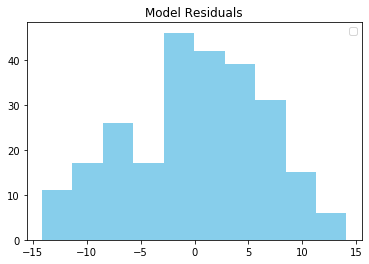

In [30]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'skyblue')
plt.title("Model Residuals")
plt.legend()
plt.show()

### __Plotting the Line__

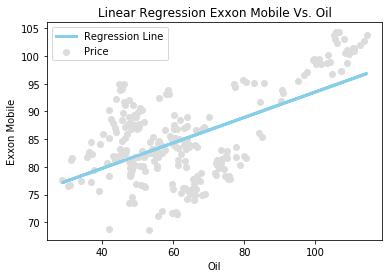

Oil coefficient:0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [31]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='skyblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(reg.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(MSE))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(MSE)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

### Save the model for future use


In [33]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(reg,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])

array([[85.99798304]])